In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import geopandas as gpd
import folium
import os
import json

import seaborn as sns
from sklearn import datasets, impute, metrics, cluster, preprocessing, neighbors, linear_model, model_selection as skms

In [122]:
#All files used (using the years of 2022-2019).
enrollment_data = pd.read_csv(os.getcwd() + "/Junior Seminar 2/Fisk Enrollment(2022-2019)/FiskEnrollment.csv")
ethnicity_data = pd.read_csv(os.getcwd() + "/Junior Seminar 2/Fisk Ethnicity(2022-2019)/FiskEthnicity.csv")
graduation_data = pd.read_csv(os.getcwd() + "/Junior Seminar 2/Fisk Graduation Rates(2022-2019)/FiskGraduation.csv")
majors_data = pd.read_csv(os.getcwd() + "/Junior Seminar 2/Fisk Majors(2022-2018)/FiskMajorsUnder.csv")
student_distribution_data = pd.read_csv(os.getcwd() + "/Junior Seminar 2/Fisk Student Migration(2022-2019)/StudentMigration.csv")

In [87]:
#Create a new Data Frame version for Gender Enrollment.
enrollment_data.dropna(axis = 1, inplace = True)
enrollment_data.drop('instnm', axis=1, inplace=True)

total_women = enrollment_data.iloc[:, 1::2].values
total_men = enrollment_data.iloc[:, ::2].values

new_enrollment_data = {'Year': [2022, 2021, 2020, 2019],
        'Total Men': total_men.flatten(),
        'Total Women': total_women.flatten()
       }
enrollment_data = pd.DataFrame(new_enrollment_data)
#display(enrollment_data)

In [88]:
#Create a new Data Frame version for Race/Ethnicity Enrollment.
ethnicity_data.dropna(axis = 1, inplace = True)
ethnicity_data.drop('instnm', axis=1, inplace=True)

indian_columns = ethnicity_data.iloc[:,::8].values
asian_columns = ethnicity_data.iloc[:, 1::8].values
black_columns = ethnicity_data.iloc[:, 2::8].values
hispanic_columns = ethnicity_data.iloc[:, 3::8].values
hawaiian_columns = ethnicity_data.iloc[:, 4::8].values
white_columns = ethnicity_data.iloc[:, 5::8].values
multiple_race_columns = ethnicity_data.iloc[:, 6::8].values
unknown_race_columns = ethnicity_data.iloc[:, 7::8].values

new_race_data ={'Year': [2022, 2021, 2020, 2019],
       'American Indian/Alaska Native total': indian_columns.flatten(),
       'Asian Total': asian_columns.flatten(),
       'Black/African American Total': black_columns.flatten(),
       'Hispanic Total': hispanic_columns.flatten(),
       'Native Hawaiian/Pacific Islander Total': hawaiian_columns.flatten(),
       'White total': white_columns.flatten(),
       'Two/More Races Total': multiple_race_columns.flatten(),
       'Ethnicity Unknown Total': unknown_race_columns.flatten()
      }

ethnicity_data = pd.DataFrame(new_race_data)
#display(ethnicity_data)

In [89]:
#Create a new Data Frame version for Student Majors.
majors_data.drop('instnm', axis=1, inplace=True)
majors_data.iloc[0] = majors_data.iloc[0].fillna(0) #Replace empty values with 0.
majors_data.drop('Unnamed: 13', axis=1, inplace=True)

education_column = majors_data.iloc[:,::6].values
engineering_column = majors_data.iloc[:, 1::6].values
biology_column = majors_data.iloc[:, 2::6].values
math_column = majors_data.iloc[:, 3::6].values
physics_column = majors_data.iloc[:, 4::6].values
business_column = majors_data.iloc[:, 5::6].values

new_majors_data ={'Year': [2022, 2020],
       'Education': education_column.flatten(),
       'Engineering': engineering_column.flatten(),
       'Biological Science': biology_column.flatten(),
       'Mathematics': math_column.flatten(),
       'Physical Science': physics_column.flatten(),
       'Business': business_column.flatten()          
      }
majors_data = pd.DataFrame(new_majors_data)
#display(majors_data)

In [123]:
#Create a new Data Frame version for Student Migration.
student_distribution_data.drop('instnm', axis=1, inplace=True) #Get rid of Institution name (Fisk University)
student_distribution_data.drop('Unnamed: 213', axis=1, inplace=True) #Get rid of unnamed column.
student_distribution_data.iloc[0] = student_distribution_data.iloc[0].fillna(0) #Replace empty values with 0.

states = pd.read_csv(os.getcwd() + "/Junior Seminar 2/Fisk Student Migration(2022-2019)/states.csv") #import a file with US states name.
us_states = pd.DataFrame(states)


new_distribution_data =pd.DataFrame({
                        '2022':[],
                        '2021':[],
                        '2020':[],
                        '2019':[],
                        'State':[]}) 
add_states = pd.merge(new_distribution_data, us_states[['State']], on='State', how='outer')
new_rows = pd.DataFrame({'State': ['Unknown State', 'Foreign State']})
distribution_data = pd.concat([add_states[['State', '2022', '2021', '2020', '2019']], new_rows], ignore_index=True)

values = []
for i in range(4):
    start = len(distribution_data) * i
    end = len(distribution_data) * (i + 1)
    values.append(student_distribution_data.iloc[:,start:end].values) #append array of each state value into another array 'value'.
    
distribution_data["2022"] = values[0][0]
distribution_data["2021"] = values[1][0]
distribution_data["2020"] = values[2][0]
distribution_data["2019"] = values[3][0]

student_distribution_data = pd.DataFrame(distribution_data)
display(student_distribution_data)

State  2022  2021  2020  2019
0                Alabama   4.0   6.0  11.0   0.0
1                 Alaska   0.0   0.0   0.0   0.0
2                Arizona   2.0   1.0   0.0   0.0
3               Arkansas   5.0   4.0   2.0   0.0
4             California  13.0  13.0  10.0   0.0
5               Colorado   0.0   0.0   2.0   0.0
6            Connecticut   1.0   1.0   0.0   0.0
7               Delaware   0.0   0.0   0.0   0.0
8   District of Columbia   0.0   2.0   1.0   0.0
9                Florida   3.0   9.0   5.0   0.0
10               Georgia  21.0  20.0  26.0   0.0
11                Hawaii   0.0   0.0   1.0   0.0
12                 Idaho   0.0   0.0   0.0   0.0
13              Illinois  28.0  29.0  32.0   0.0
14               Indiana   6.0   4.0   0.0   0.0
15                  Iowa   1.0   1.0   0.0   0.0
16                Kansas   0.0   0.0   1.0   0.0
17              Kentucky   3.0   8.0   5.0   0.0
18             Louisiana   3.0   7.0   4.0   0.0
19                 Maine   0.0   0.0   0.0   0.0
20               Montana   8.0   7.0   4.0   0.0
21              Nebraska   3.0   1.0   0.0   0.0
22                Nevada   8.0  10.0   6.0   0.0
23         New Hampshire   1.0   1.0   1.0   0.0
24            New Jersey   2.0   4.0   6.0   0.0
25            New Mexico  10.0   9.0   5.0   0.0
26              New York   0.0   0.0   0.0   0.0
27        North Carolina   0.0   0.0   0.0   0.0
28          North Dakota   1.0   0.0   0.0   0.0
29                  Ohio   0.0   0.0   0.0   0.0
30              Oklahoma   0.0   1.0   7.0   0.0
31                Oregon   0.0   0.0   0.0   0.0
32              Maryland   3.0   8.0   4.0   0.0
33         Massachusetts   3.0   2.0   2.0   0.0
34              Michigan   1.0   1.0   0.0   0.0
35             Minnesota  14.0   7.0   3.0   0.0
36           Mississippi   1.0   0.0   2.0   0.0
37              Missouri   0.0   0.0   0.0   0.0
38          Pennsylvania   3.0   2.0   1.0   0.0
39          Rhode Island   0.0   0.0   0.0   0.0
40        South Carolina   1.0   1.0   1.0   0.0
41          South Dakota   0.0   0.0   0.0   0.0
42             Tennessee  91.0  78.0  62.0   0.0
43                 Texas  20.0  10.0  14.0   0.0
44                  Utah   0.0   0.0   0.0   0.0
45               Vermont   0.0   0.0   0.0   0.0
46              Virginia   0.0   2.0   0.0   0.0
47            Washington   0.0   2.0   0.0   0.0
48         West Virginia   0.0   0.0   0.0   0.0
49             Wisconsin   4.0   3.0   2.0   0.0
50               Wyoming   0.0   0.0   0.0   0.0
51         Unknown State   0.0   9.0   0.0   0.0
52         Foreign State  38.0  32.0   0.0   0.0

In [91]:
#Create a new Data Frame version for Graduated students.
graduation_data.dropna(axis = 1, inplace = True)
graduation_data.drop('instnm', axis=1, inplace=True)

four_years = graduation_data.iloc[:,::3].values
five_years = graduation_data.iloc[:, 1::3].values
six_years = graduation_data.iloc[:, 2::3].values

new_graduation_data ={'Year': [2022, 2021, 2020, 2019],
       'Graduated in 4 Years': four_years.flatten(),
       'Graduated in 5 Years': five_years.flatten(),
       'Graduated in 6 Years': six_years.flatten()
      }
graduation_data = pd.DataFrame(new_graduation_data)
#display(graduation_data)

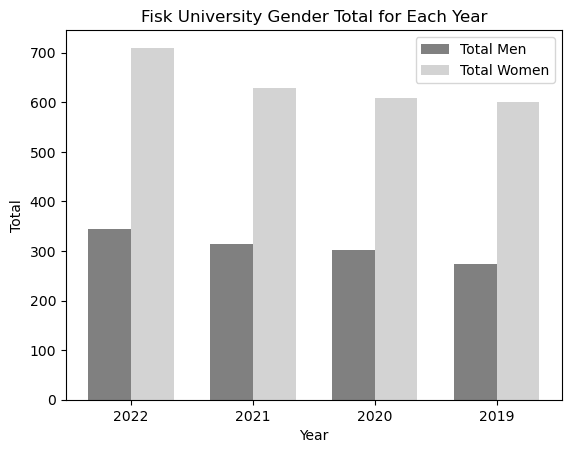

In [120]:
bar_width = 0.35
bar_positions1 = np.arange(len(enrollment_data['Year']))
bar_positions2 = bar_positions1 + bar_width

plt.bar(bar_positions1, enrollment_data['Total Men'], width=bar_width, label='Total Men', color='grey')
plt.bar(bar_positions2, enrollment_data['Total Women'], width=bar_width, label='Total Women', color='lightgrey')

plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Fisk University Gender Total for Each Year')

years = enrollment_data['Year'].tolist()
plt.xticks(bar_positions1 + bar_width / 2, years)
plt.legend()
plt.savefig(os.getcwd() + "/Junior Seminar 2/Fisk Enrollment(2022-2019)/gender.png")

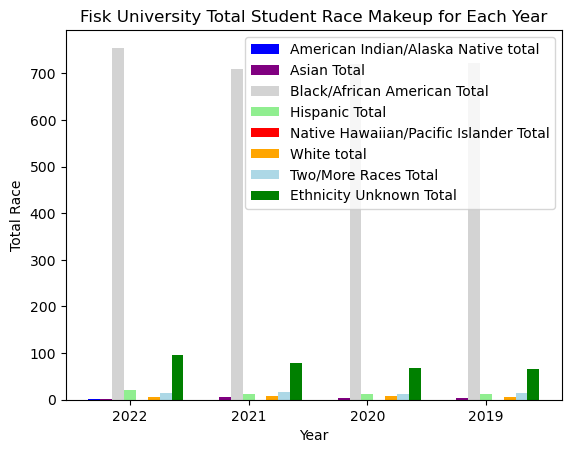

In [119]:
bar_width = 0.10
bar_positions1 = np.arange(len(ethnicity_data['Year']))
bar_positions2 = bar_positions1 + bar_width
bar_positions3 = bar_positions2 + bar_width
bar_positions4 = bar_positions3 + bar_width
bar_positions5 = bar_positions4 + bar_width
bar_positions6 = bar_positions5 + bar_width
bar_positions7 = bar_positions6 + bar_width
bar_positions8 = bar_positions7 + bar_width

plt.bar(bar_positions1, ethnicity_data['American Indian/Alaska Native total'], width=bar_width, label='American Indian/Alaska Native total', color='blue')
plt.bar(bar_positions2, ethnicity_data['Asian Total'], width=bar_width, label='Asian Total', color='purple')
plt.bar(bar_positions3, ethnicity_data['Black/African American Total'], width=bar_width, label='Black/African American Total', color='lightgrey')
plt.bar(bar_positions4, ethnicity_data['Hispanic Total'], width=bar_width, label='Hispanic Total', color='lightgreen')
plt.bar(bar_positions5, ethnicity_data['Native Hawaiian/Pacific Islander Total'], width=bar_width, label='Native Hawaiian/Pacific Islander Total', color='red')
plt.bar(bar_positions6, ethnicity_data['White total'], width=bar_width, label='White total', color='orange')
plt.bar(bar_positions7, ethnicity_data['Two/More Races Total'], width=bar_width, label='Two/More Races Total', color='lightblue')
plt.bar(bar_positions8, ethnicity_data['Ethnicity Unknown Total'], width=bar_width, label='Ethnicity Unknown Total', color='green')

plt.xlabel('Year')
plt.ylabel('Total Race')
plt.title('Fisk University Total Student Race Makeup for Each Year')

years = ethnicity_data['Year'].tolist()
plt.xticks(bar_positions4, years)

plt.legend()
plt.savefig(os.getcwd() + "/Junior Seminar 2/Fisk Ethnicity(2022-2019)/race.png")

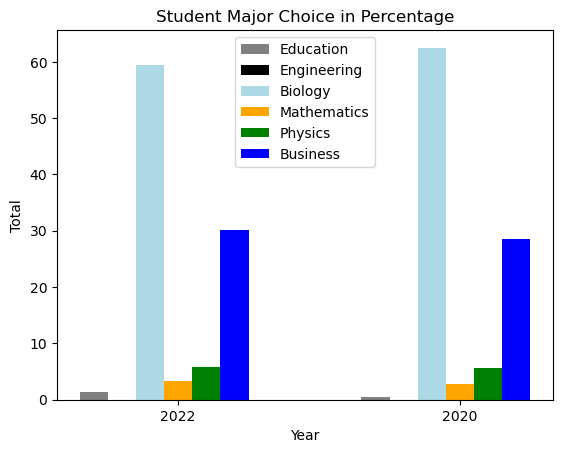

In [118]:
#Calculate Percentages
student_major = majors_data[["Education","Engineering", "Biological Science","Mathematics","Physical Science","Business"]]
row_sums = student_major.sum(axis=1)
calculate = student_major.div(row_sums, axis=0) * 100
major_percentage = pd.concat([majors_data['Year'], calculate], axis=1)


bar_width = 0.10
bar_positions1 = np.arange(len(major_percentage['Year']))
bar_positions2 = bar_positions1 + bar_width
bar_positions3 = bar_positions2 + bar_width
bar_positions4 = bar_positions3 + bar_width
bar_positions5 = bar_positions4 + bar_width
bar_positions6 = bar_positions5 + bar_width

plt.bar(bar_positions1, major_percentage['Education'], width=bar_width, label='Education', color='grey')
plt.bar(bar_positions2, major_percentage['Engineering'], width=bar_width, label='Engineering', color='black')
plt.bar(bar_positions3, major_percentage['Biological Science'], width=bar_width, label='Biology', color='lightblue')
plt.bar(bar_positions4, major_percentage['Mathematics'], width=bar_width, label='Mathematics', color='orange')
plt.bar(bar_positions5, major_percentage['Physical Science'], width=bar_width, label='Physics', color='green')
plt.bar(bar_positions6, major_percentage['Business'], width=bar_width, label='Business', color='blue')


plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Student Major Choice in Percentage')

years = major_percentage['Year'].tolist()
plt.xticks(bar_positions3 + bar_width, years)

plt.legend()
plt.savefig(os.getcwd() + "/Junior Seminar 2/Fisk Majors(2022-2018)/major.png")

In [98]:
#Rewrite the Data Frame to Change all Country names (except US) to "International State". And rewrtie a column name to "State". 
world_map = gpd.read_file(os.getcwd() + '/Junior Seminar 2/Fisk Student Migration(2022-2019)/world-administrative-boundaries/world-administrative-boundaries.shp')
world_map = world_map.rename(columns={'name':'State'})
world_map = world_map[world_map['State'] != 'United States']
world_map['State'] = "Foreign State"
world_map_merge = world_map.merge(student_distribution_data, on="State")

#Merge World Map with the created student Distribution Data Frame of the United States.
gdf = gpd.read_file(os.getcwd() + '/Junior Seminar 2/Fisk Student Migration(2022-2019)/tl_2023_us_state/tl_2023_us_state.shp')
gdf = gdf.rename(columns={'NAME': 'State'})
gdf = gdf.to_crs(world_map_merge.crs)
merged_map = gdf.merge(student_distribution_data, on='State')
world_map2 = gpd.GeoDataFrame(pd.concat([world_map_merge, merged_map], ignore_index=True))


In [99]:
map_1 = folium.Map(location=[0, 0], zoom_start=2)
# Map for 2022
folium.Choropleth(
    geo_data=world_map2,
    name='choropleth',
    data=world_map2, 
    columns=['State', '2022'],  
    key_on='feature.properties.State',  
    fill_color='YlGn',  
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Student Migration of 2022'
).add_to(map_1)



In [100]:
map_2 = folium.Map(location=[0, 0], zoom_start=2)
folium.Choropleth(
    geo_data=world_map2,
    name='choropleth',
    data=world_map2, 
    columns=['State', '2021'],  
    key_on='feature.properties.State',  
    fill_color='YlGn',  
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Student Migration of 2021'
).add_to(map_2)

In [101]:
map_3 = folium.Map(location=[0, 0], zoom_start=2)
folium.Choropleth(
    geo_data=world_map2,
    name='choropleth',
    data=world_map2, 
    columns=['State', '2020'],  
    key_on='feature.properties.State',  
    fill_color='YlGn',  
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Student Migration of 2020'
).add_to(map_3)

In [102]:
#Not much data was collected for this year.
map_4 = folium.Map(location=[0, 0], zoom_start=2)
folium.Choropleth(
    geo_data=world_map2,
    name='choropleth',
    data=world_map2, 
    columns=['State', '2019'],  
    key_on='feature.properties.State',  
    fill_color='YlGn',  
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Student Migration of 2019'
).add_to(map_4)

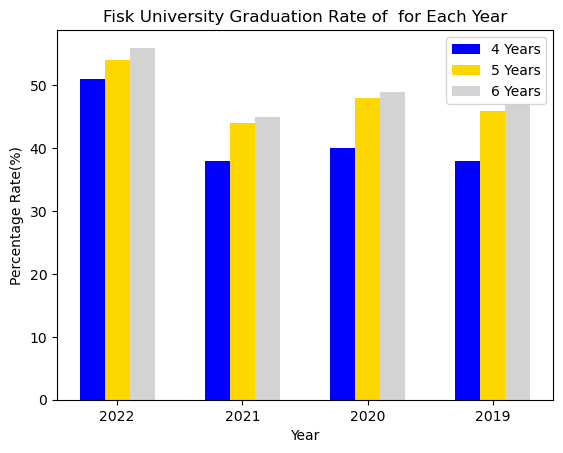

In [117]:
bar_width = 0.20
bar_positions1 = np.arange(len(graduation_data['Year']))
bar_positions2 = bar_positions1 + bar_width
bar_positions3 = bar_positions2 + bar_width
#average_rate_value = graduation_data.mean().mean()
#print(average_rate_value)

plt.bar(bar_positions1, graduation_data['Graduated in 4 Years'], width=bar_width, label='4 Years', color='blue')
plt.bar(bar_positions2, graduation_data['Graduated in 5 Years'], width=bar_width, label='5 Years', color='gold')
plt.bar(bar_positions3, graduation_data['Graduated in 6 Years'], width=bar_width, label='6 Years', color='lightgrey')

plt.xlabel('Year')
plt.ylabel('Percentage Rate(%)')
plt.title('Fisk University Graduation Rate of  for Each Year')

years = graduation_data['Year'].tolist()
plt.xticks(bar_positions1 + bar_width, years) #Create the x-axis ticks and year markings

#plt.axhline(y=average_rate_value, color='red', linestyle='--', label='Threshold')

plt.legend()
plt.savefig(os.getcwd() + "/Junior Seminar 2/Fisk Graduation Rates(2022-2019)/graduation.png")